In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 216s 1us/step


In [5]:
x_train[0].shape

(32, 32, 3)

no need to reshape, got what i need

In [6]:
x_train = x_train /255

In [7]:
x_test = x_test/255

In [8]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_cat_train = to_categorical(y_train, 10)

In [12]:
y_cat_test = to_categorical(y_test, 10)

need to change the values to categories

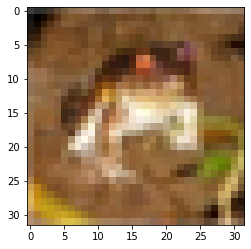

In [13]:
plt.imshow(x_train[0])

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten

In [15]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu')) #grab input shape from the code we ran earlier
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=(32,32,3), activation='relu')) #grab input shape from the code we ran earlier
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation = 'relu')) #more complex since colours are involved so added more neurons

model.add(Dense(10, activation='softmax')) #softmax since multiclass problem

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stop = EarlyStopping(monitor='val_losses', patience = 3)

In [18]:
model.fit(x_train, y_cat_train, epochs=20, 
         validation_data = (x_test, y_cat_test), callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.4775 - accuracy: 0.4686 - val_loss: 1.2619 - val_accuracy: 0.5573
Epoch 2/20
50000/50000 [==============================] - 57s 1ms/sample - loss: 1.1335 - accuracy: 0.6005 - val_loss: 1.0887 - val_accuracy: 0.6148
Epoch 3/20
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.9788 - accuracy: 0.6578 - val_loss: 1.0646 - val_accuracy: 0.6310
Epoch 4/20
50000/50000 [==============================] - 56s 1ms/sample - loss: 0.8636 - accuracy: 0.6988 - val_loss: 0.9822 - val_accuracy: 0.6672
Epoch 5/20
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.7652 - accuracy: 0.7336 - val_loss: 1.0084 - val_accuracy: 0.6615
Epoch 6/20
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.6747 - accuracy: 0.7636 - val_loss: 0.9727 - val_accuracy: 0.6810
Epoch 7/20
50000/50000 [==============================] 

96% accuracy on last round

In [19]:
metrics = pd.DataFrame(model.history.history)

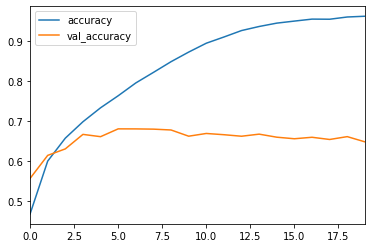

In [20]:
metrics[['accuracy', 'val_accuracy']].plot()

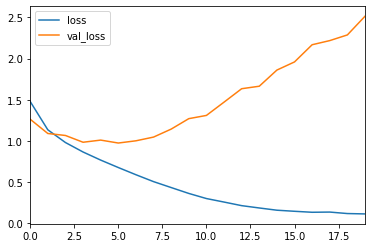

In [21]:
metrics[['loss', 'val_loss']].plot()

stop training at like 7 epochs cause it aint looking good

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
predictions = model.predict_classes(x_test)

In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68      1000
           1       0.68      0.84      0.76      1000
           2       0.52      0.59      0.55      1000
           3       0.46      0.48      0.47      1000
           4       0.65      0.54      0.59      1000
           5       0.61      0.39      0.48      1000
           6       0.76      0.72      0.74      1000
           7       0.69      0.74      0.71      1000
           8       0.72      0.79      0.75      1000
           9       0.81      0.65      0.72      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.64     10000
weighted avg       0.65      0.65      0.64     10000



Considering model would have a 1/10 chance of being right, we got some good accuracy

doesnt do too good with cats and dog

Does good with cars considering there is a trucks category too

In [25]:
print(confusion_matrix(y_test, predictions))

[[740  27  64  18  10   4   5   9 104  19]
 [ 21 845   7  14   1   4   7  10  38  53]
 [ 88  22 590  66  50  45  59  41  32   7]
 [ 47  31 105 482  77  99  55  55  32  17]
 [ 49  23 103  80 535  39  52  94  23   2]
 [ 30  16 116 228  57 394  29  96  21  13]
 [ 10  37  58  83  39  20 725  12   7   9]
 [ 34  23  45  48  49  27  11 737  11  15]
 [ 88  51  21  13   3   6   5   4 790  19]
 [ 74 163  20  18   5   8   6  15  43 648]]


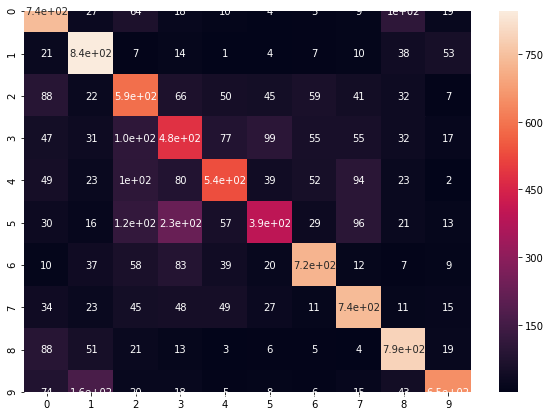

In [27]:
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

some confusion between 3 and 5 

In [26]:
test = x_test[6]

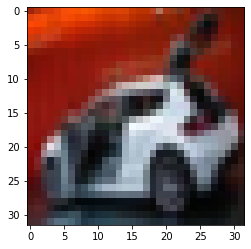

In [30]:
plt.imshow(test.reshape(32,32,3))

In [32]:
model.predict_classes(test.reshape(1,32,32,3))

array([1])

In [33]:
from tensorflow.keras.models import load_model

In [34]:
model.save('colourimagepredictor.h5')